# Statistiques descriptives 

# Modules utiles

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import scale 


## Données ENEDIS

"Ce jeu de données restitue la consommation d’électricité au pas 1/2h des points de soutirage <= 36kVA raccordés au réseau Enedis. Il donne les volumes d'énergie soutirés, les courbes de charge moyennes de clients dotés de compteurs communicants et le nombre de clients. Ces agrégats sont disponibles par plage de puissance souscrite, profil et région."

Dictionnaire des variables : https://data.enedis.fr/api/datasets/1.0/conso-inf36-region/attachments/note_externe_jdd_article_23_pdf/

In [39]:
#chemin elena
enedis = pd.read_csv("C:/Users/elelo/Documents/ENSAE/données statapp/Données/conso-inf36-region.csv",sep=";")

#chemin jérémie
#enedis = pd.read_csv("/Users/jeremiedarracq/Stat-app/enedis.csv",sep=";")

#chemin côme
#enedis = pd.read_csv("/Users/",sep=";")


On récupère la date :

In [40]:
## On extrait la date pour classifier par jour 
enedis["date"]=enedis["Horodate"].apply(lambda x : x[0:10])
enedis

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1),date
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,1376,2095739.0,2084.0,48,1368.0,48,1727.0,97,0,1,2022-09-30
1,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P4: ]9-12] kVA,52691,12376840.0,443.0,8,202.0,8,322.0,16,0,1,2022-09-30
2,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P8: ]24-30] kVA,8350,6545703.0,1012.0,10,474.0,11,742.0,22,0,1,2022-09-30
3,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO2 (+ PRO2WE + PRO6),P3: ]6-9] kVA,19759,7072016.0,693.0,13,466.0,13,579.0,26,0,1,2022-09-30
4,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO5,P1: ]0-3] kVA,55645,18921676.0,428.0,16,239.0,16,334.0,33,0,1,2022-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108994,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO2 (+ PRO2WE + PRO6),P6: ]15-18] kVA,15355,12666774.0,1613.0,13,1001.0,13,1307.0,26,0,0,2022-07-06
4108995,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO3,P4: ]9-12] kVA,370,436549.0,NaN,S,NaN,S,NaN,S,0,0,2022-07-06
4108996,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO5,P3: ]6-9] kVA,3148,6923922.0,725.0,27,774.0,27,749.0,55,0,0,2022-07-06
4108997,2022-07-06T00:00:00+02:00,Île-de-France,11,RES1 (+ RES1WE),P0: Total <= 36 kVA,3476435,287893977.0,90.0,< 1,73.0,< 1,82.0,1,0,0,2022-07-06


In [44]:
## On base l'analyse que sur les consommateurs de la plage de puissance P0 Total <= 36kVA
enedis_conso = enedis[enedis["Plage de puissance souscrite"] == "P0: Total <= 36 kVA"]
enedis_conso

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1),date
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,1376,2095739.0,2084.0,48,1368.0,48,1727.0,97,0,1,2022-09-30
8,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,RES2WE,P0: Total <= 36 kVA,30090,10333977.0,400.0,15,200.0,15,301.0,30,0,1,2022-09-30
10,2022-09-30T23:30:00+02:00,Bourgogne-Franche-Comté,27,PRO2 (+ PRO2WE + PRO6),P0: Total <= 36 kVA,47561,33811703.0,948.0,14,691.0,14,819.0,28,0,1,2022-09-30
15,2022-09-30T23:30:00+02:00,Bourgogne-Franche-Comté,27,PRO4,P0: Total <= 36 kVA,2876,1425313.0,588.0,14,686.0,14,475.0,29,0,1,2022-09-30
21,2022-09-30T23:30:00+02:00,Bretagne,53,PRO5,P0: Total <= 36 kVA,25005,15618899.0,525.0,34,603.0,35,564.0,69,0,1,2022-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108981,2022-07-06T00:00:00+02:00,Grand-Est,44,RES3,P0: Total <= 36 kVA,14340,5834762.0,303.0,11,395.0,11,349.0,22,0,0,2022-07-06
4108982,2022-07-06T00:00:00+02:00,Grand-Est,44,RES4,P0: Total <= 36 kVA,33457,6732705.0,260.0,7,296.0,7,223.0,15,0,0,2022-07-06
4108988,2022-07-06T00:00:00+02:00,Hauts-de-France,32,RES1 (+ RES1WE),P0: Total <= 36 kVA,1230358,118376611.0,116.0,1,89.0,1,102.0,2,0,0,2022-07-06
4108990,2022-07-06T00:00:00+02:00,Hauts-de-France,32,RES4,P0: Total <= 36 kVA,26940,4941022.0,239.0,9,257.0,9,202.0,18,0,0,2022-07-06


C:\Users\elelo\AppData\Local\Temp/ipykernel_13024/2696686519.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  enedis_conso_idf = enedis_conso[enedis["Région"] == "Île-de-France"]
C:\Users\elelo\AppData\Local\Temp/ipykernel_13024/2696686519.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  enedis_conso_Bretagne = enedis_conso[enedis["Région"] == "Bretagne"]
C:\Users\elelo\AppData\Local\Temp/ipykernel_13024/2696686519.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  enedis_conso_AuvergneRA = enedis_conso[enedis["Région"] == 'Auvergne-Rhône-Alpes']
C:\Users\elelo\AppData\Local\Temp/ipykernel_13024/2696686519.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  enedis_conso_BourgogneFC = enedis_conso[enedis["Région"] == 'Bourgogne-Franche-Comté']
C:\Users\elelo\AppData\Local\Temp/ipykernel_13024/2696686519.py:31: UserWarning: Boolean Series key will be r

<BarContainer object of 12 artists>

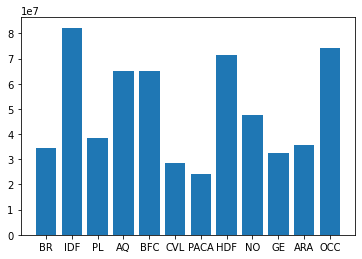

In [195]:
## Statistique descriptive consommation quotidienne moyenne pour chaque région 
## Code à optimiser 
## Méthode : on calcul la consommation pour chaque jours pour chaque région puis on fait une moyenne pour chaque région

## IDF 
enedis_conso_idf = enedis_conso[enedis["Région"] == "Île-de-France"]
conso_quotidienne_idf = enedis_conso_idf.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_idf = conso_quotidienne_idf.rename(columns = {'mean': 'idf'})

##Bretagne 
enedis_conso_Bretagne = enedis_conso[enedis["Région"] == "Bretagne"]
conso_quotidienne_Bretagne = enedis_conso_Bretagne.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Bretagne = conso_quotidienne_Bretagne.rename(columns = {'mean': 'Bretagne'})
conso_quotidienne_Bretagne

Liste_Région = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté','Centre-Val de Loire', 'Grand-Est', 'Hauts-de-France', 'Normandie', 'Nouvelle Aquitaine', 'Occitanie','Pays de la Loire', "Provence-Alpes-Côte d'Azur","Île-de-France","Bretagne"]

##Auvergne-Rhône-Alpes
enedis_conso_AuvergneRA = enedis_conso[enedis["Région"] == 'Auvergne-Rhône-Alpes']
conso_quotidienne_AuvergneRA= enedis_conso_AuvergneRA.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_AuvergneRA = conso_quotidienne_AuvergneRA.rename(columns = {'mean': 'AuvergneRA'})
conso_quotidienne_AuvergneRA

##Bourgogne-france-Comté 
enedis_conso_BourgogneFC = enedis_conso[enedis["Région"] == 'Bourgogne-Franche-Comté']
conso_quotidienne_BourgogneFC= enedis_conso_BourgogneFC.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_BourgogneFC = conso_quotidienne_BourgogneFC.rename(columns = {'mean': 'BourgogneFC'})
conso_quotidienne_BourgogneFC

##Centre-Val de Loire
enedis_conso_CentreVL = enedis_conso[enedis["Région"] == 'Centre-Val de Loire']
conso_quotidienne_CentreVL= enedis_conso_CentreVL.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_CentreVL = conso_quotidienne_CentreVL.rename(columns = {'mean': 'CentreVL'})
conso_quotidienne_CentreVL

##Grand-Est
enedis_conso_GrandEst = enedis_conso[enedis["Région"] == 'Grand-Est']
conso_quotidienne_GrandEst= enedis_conso_GrandEst.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_GrandEst = conso_quotidienne_GrandEst.rename(columns = {'mean': 'GrandEst'})
conso_quotidienne_GrandEst

##Normandie
enedis_conso_Normandie = enedis_conso[enedis["Région"] == 'Normandie']
conso_quotidienne_Normandie= enedis_conso_Normandie.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Normandie = conso_quotidienne_Normandie.rename(columns = {'mean': 'Normandie'})
conso_quotidienne_GrandEst

##haut-de-France
enedis_conso_HDF = enedis_conso[enedis["Région"] == 'Hauts-de-France']
conso_quotidienne_HDF= enedis_conso_HDF.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_HDF = conso_quotidienne_HDF.rename(columns = {'mean': 'HDF'})
conso_quotidienne_HDF

##Occitanie
enedis_conso_Occitanie = enedis_conso[enedis["Région"] == 'Occitanie']
conso_quotidienne_Occitanie= enedis_conso_Occitanie.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Occitanie = conso_quotidienne_Occitanie.rename(columns = {'mean': 'Occitanie'})
conso_quotidienne_Occitanie

##Pays-de-la Loire
enedis_conso_PaysdeLoire = enedis_conso[enedis["Région"] == 'Pays de la Loire']
conso_quotidienne_PaysdeLoire= enedis_conso_PaysdeLoire.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_PaysdeLoire = conso_quotidienne_PaysdeLoire.rename(columns = {'mean': 'PaysdeLoire'})
conso_quotidienne_PaysdeLoire

##'Nouvelle Aquitaine'
enedis_conso_Aquitaine = enedis_conso[enedis["Région"] == 'Nouvelle Aquitaine']
conso_quotidienne_Aquitaine= enedis_conso_Aquitaine.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Aquitaine = conso_quotidienne_Aquitaine.rename(columns = {'mean': 'Aquitaine'})
conso_quotidienne_Aquitaine

##'Nouvelle Aquitaine'
enedis_conso_ProvenceAlpesAzur = enedis_conso[enedis["Région"] == "Provence-Alpes-Côte d'Azur"]
conso_quotidienne_ProvenceAlpesAzur= enedis_conso_ProvenceAlpesAzur.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_ProvenceAlpesAzur = conso_quotidienne_ProvenceAlpesAzur.rename(columns = {'mean': 'ProvenceAlpesAzur'})
conso_quotidienne_ProvenceAlpesAzur

## Consommation quotidienne par jour 
conso_quotidienne = pd.concat([conso_quotidienne_Bretagne,conso_quotidienne_idf,conso_quotidienne_PaysdeLoire,conso_quotidienne_Aquitaine,conso_quotidienne_BourgogneFC,conso_quotidienne_CentreVL,conso_quotidienne_ProvenceAlpesAzur,conso_quotidienne_HDF,conso_quotidienne_Normandie,conso_quotidienne_GrandEst,conso_quotidienne_AuvergneRA,conso_quotidienne_Occitanie], axis=1)
conso_quotidienne

## Consommation quotidienne moyenne par jour 
conso_quotidienne_moyenne = conso_quotidienne.describe()
valeur_quotidienne_moyenne = [3.433561e+07,8.227272e+07,3.834750e+07,6.487820e+07,6.487820e+07,2.837360e+07,2.423856e+07,7.148559e+07,4.751099e+07,3.268860e+07,3.579310e+07,7.440100e+07]
Liste_Région = ['BR','IDF',"PL", 'AQ', 'BFC', 'CVL', 'PACA',"HDF","NO","GE","ARA","OCC"] ## Abréviation des régions

plt.bar(Liste_Région,valeur_quotidienne_moyenne,label="Conso moyenne par jour selon les régions")
## Observation : IDF / OCCITANIE / Haut de France régions qui ont la consommation moyenne par jour la plus éléve 
## Problème: peu-être qu'il faudrait relier ça avec les types de profils / plage de puissance souscrite par région car possible qu'il y ait plus d'entreprises en IDF 



## Données méteo


**Données des températures régionales du 1er janvier 2018 au 31 octobre 2022 :**

In [46]:
meteo_reg_df=pd.read_csv("Données/temperature-quotidienne-regionale.csv",";")
meteo_reg_df


c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,date,code_insee_region,region,tmin,tmax,tmoy
0,2018-01-01T00:00:00-11,2018-01-01,11,Île-de-France,5.96,9.28,7.62
1,2018-01-01T00:00:00-28,2018-01-01,28,Normandie,5.00,8.98,6.99
2,2018-01-01T00:00:00-24,2018-01-01,24,Centre-Val de Loire,5.25,9.68,7.47
3,2018-01-02T00:00:00-11,2018-01-02,11,Île-de-France,5.32,13.60,9.46
4,2018-01-02T00:00:00-84,2018-01-02,84,Auvergne-Rhône-Alpes,3.02,11.56,7.29
...,...,...,...,...,...,...,...
32404,2022-10-30T00:00:00-93,2022-10-30,93,Provence-Alpes-Côte d'Azur,11.82,23.62,17.72
32405,2022-10-30T00:00:00-32,2022-10-30,32,Hauts-de-France,11.66,16.96,14.31
32406,2022-10-30T00:00:00-76,2022-10-30,76,Occitanie,12.33,23.24,17.78
32407,2022-10-31T00:00:00-24,2022-10-31,24,Centre-Val de Loire,11.05,21.63,16.34


In [47]:
meteo_reg_df.groupby(["region"])["tmoy"]

Boite à moustache des températures. Consommation moyenne quotidienne par région, chaque jour combien un foyer consomme

## Données socio économique

In [48]:
socio=pd.read_csv("Données/data_socio.csv",sep=";",header=2)
socio

,Code,Libellé,"Part des ""artisans, commerçants, chefs d'entreprise"" dans la population 2018","Part des ""employés"" dans la population 2018","Part des ""ouvriers"" dans la population 2018","Part des ""retraités"" dans la population 2018","Part des ""agriculteurs exploitants"" dans la population 2018","Part des ""professions intermédiaires"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018.1","Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018
0,1,Guadeloupe,4.9,18.7,10.4,23.0,0.8,12.0,25.3,26.5,4.8,NaN,387629.0,16.4,16.3,23.3,17.3,8.3,28.3
1,2,Martinique,3.9,19.0,11.1,25.2,0.7,12.4,22.4,22.8,5.2,17880.0,368783.0,15.7,15.5,24.6,18.2,9.6,23.0
2,3,Guyane,3.3,15.2,10.7,7.0,0.8,10.9,46.8,51.1,5.2,NaN,276128.0,23.4,20.5,14.5,6.8,1.9,34.2
3,4,La Réunion,3.5,20.3,13.1,14.9,0.9,12.2,30.1,35.2,4.9,15440.0,855961.0,19.7,19.2,21.2,12.3,4.7,32.8
4,6,Mayotte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,Île-de-France,3.2,16.4,8.5,19.4,0.1,15.9,18.3,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
6,24,Centre-Val de Loire,3.2,16.0,13.9,31.0,1.0,13.8,14.1,16.2,7.1,21560.0,2572853.0,15.9,17.5,20.1,18.1,10.7,12.5
7,27,Bourgogne-Franche-Comté,3.3,15.2,14.8,31.4,1.2,13.1,14.6,17.1,6.3,21480.0,2807807.0,16.2,17.3,20.1,18.6,10.9,12.0
8,28,Normandie,3.2,16.0,14.4,30.1,1.0,13.4,15.5,17.6,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2
9,32,Hauts-de-France,2.6,16.4,14.7,25.5,0.5,13.5,19.8,23.4,7.0,20110.0,6004108.0,18.5,18.8,19.5,15.9,7.9,16.3


In [49]:
socio["Code"]=socio["Code"].astype("str")
socio.drop( socio[ (socio['Code'] == "1") | (socio['Code'] == "2") | (socio['Code'] == "3") | (socio['Code'] == "4") | (socio['Code'] == "6")].index, inplace=True)
socio

,Code,Libellé,"Part des ""artisans, commerçants, chefs d'entreprise"" dans la population 2018","Part des ""employés"" dans la population 2018","Part des ""ouvriers"" dans la population 2018","Part des ""retraités"" dans la population 2018","Part des ""agriculteurs exploitants"" dans la population 2018","Part des ""professions intermédiaires"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018.1","Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018
5,11,Île-de-France,3.2,16.4,8.5,19.4,0.1,15.9,18.3,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
6,24,Centre-Val de Loire,3.2,16.0,13.9,31.0,1.0,13.8,14.1,16.2,7.1,21560.0,2572853.0,15.9,17.5,20.1,18.1,10.7,12.5
7,27,Bourgogne-Franche-Comté,3.3,15.2,14.8,31.4,1.2,13.1,14.6,17.1,6.3,21480.0,2807807.0,16.2,17.3,20.1,18.6,10.9,12.0
8,28,Normandie,3.2,16.0,14.4,30.1,1.0,13.4,15.5,17.6,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2
9,32,Hauts-de-France,2.6,16.4,14.7,25.5,0.5,13.5,19.8,23.4,7.0,20110.0,6004108.0,18.5,18.8,19.5,15.9,7.9,16.3
10,44,Grand Est,2.9,16.4,14.7,27.3,0.8,13.8,17.0,20.4,7.2,21610.0,5550389.0,17.5,18.3,20.6,17.1,9.3,13.3
11,52,Pays de la Loire,3.3,15.3,14.8,29.4,1.2,14.2,13.9,15.6,7.8,21620.0,3781423.0,17.0,18.4,19.5,16.8,9.7,11.2
12,53,Bretagne,3.5,15.1,13.0,31.2,1.3,13.7,14.7,16.2,7.6,21750.0,3335414.0,16.4,17.6,20.1,18.1,10.5,11.4
13,75,Nouvelle-Aquitaine,4.0,15.9,12.1,31.9,1.3,13.1,14.7,16.7,7.1,21290.0,5979778.0,15.9,17.4,20.3,19.0,11.4,12.6
14,76,Occitanie,4.3,15.7,10.2,29.3,1.2,13.6,17.3,20.1,8.4,20740.0,5885496.0,16.8,17.7,20.0,18.1,10.7,14.5


In [50]:
socio["Code"]=pd.to_numeric(socio["Code"])

## Base de données merged

In [52]:
enedis_socio=pd.merge(enedis,socio,how='left',left_on="Code région",right_on="Code")

In [53]:
enedis_socio

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),...,"Part des ""autres sans activité professionnelle"" dans la population 2018.1","Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,1376,2095739.0,2084.0,48,1368.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
1,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P4: ]9-12] kVA,52691,12376840.0,443.0,8,202.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
2,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P8: ]24-30] kVA,8350,6545703.0,1012.0,10,474.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
3,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO2 (+ PRO2WE + PRO6),P3: ]6-9] kVA,19759,7072016.0,693.0,13,466.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
4,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO5,P1: ]0-3] kVA,55645,18921676.0,428.0,16,239.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108994,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO2 (+ PRO2WE + PRO6),P6: ]15-18] kVA,15355,12666774.0,1613.0,13,1001.0,...,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
4108995,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO3,P4: ]9-12] kVA,370,436549.0,NaN,S,NaN,...,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
4108996,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO5,P3: ]6-9] kVA,3148,6923922.0,725.0,27,774.0,...,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
4108997,2022-07-06T00:00:00+02:00,Île-de-France,11,RES1 (+ RES1WE),P0: Total <= 36 kVA,3476435,287893977.0,90.0,< 1,73.0,...,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1


Finalement, il faut merger les données météo et enedis sur date et région

In [131]:
enedis_final=pd.merge(enedis_socio,meteo_reg_df,how='left',left_on=["date","Code région"],right_on=["date","code_insee_region"])

*Problème de valeurs manquantes :*

In [217]:
# Affiche les données où il y a des valeurs manquantes pour tmoy

bool_series = pd.isnull(enedis_final["tmoy"])
nul=enedis_final[bool_series]
nul


,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),...,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018,id,code_insee_region,region,tmin,tmax,tmoy
1416960,2022-08-31T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P4: ]9-12] kVA,52597,11721906.0,406.0,8,167.0,...,19.8,16.2,9.4,11.4,NaN,NaN,NaN,NaN,NaN,NaN
1416961,2022-08-31T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO5,P5: ]12-15] kVA,769,2850843.0,1643.0,30,1640.0,...,19.8,16.2,9.4,11.4,NaN,NaN,NaN,NaN,NaN,NaN
1416962,2022-08-31T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO5,P8: ]24-30] kVA,80,NaN,NaN,S,NaN,...,19.8,16.2,9.4,11.4,NaN,NaN,NaN,NaN,NaN,NaN
1416963,2022-08-31T23:30:00+02:00,Auvergne-Rhône-Alpes,84,RES11 (+ RES11WE),P6: ]15-18] kVA,21258,6908888.0,419.0,6,314.0,...,19.8,16.2,9.4,11.4,NaN,NaN,NaN,NaN,NaN,NaN
1416964,2022-08-31T23:30:00+02:00,Auvergne-Rhône-Alpes,84,RES2 (+ RES5),P0: Total <= 36 kVA,1569674,553775476.0,470.0,3,271.0,...,19.8,16.2,9.4,11.4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928379,2022-07-31T00:00:00+02:00,Provence-Alpes-Côte d'Azur,93,PRO1 (+ PRO1WE),P0: Total <= 36 kVA,329145,88152907.0,361.0,8,306.0,...,20.1,18.0,11.1,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2928380,2022-07-31T00:00:00+02:00,Provence-Alpes-Côte d'Azur,93,RES11 (+ RES11WE),P3: ]6-9] kVA,198539,42177587.0,320.0,5,245.0,...,20.1,18.0,11.1,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2928381,2022-07-31T00:00:00+02:00,Provence-Alpes-Côte d'Azur,93,RES2WE,P3: ]6-9] kVA,12226,3651209.0,328.0,15,383.0,...,20.1,18.0,11.1,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2928382,2022-07-31T00:00:00+02:00,Provence-Alpes-Côte d'Azur,93,RES3,P0: Total <= 36 kVA,32947,19325016.0,554.0,12,673.0,...,20.1,18.0,11.1,14.0,NaN,NaN,NaN,NaN,NaN,NaN


## Statistiques descriptives sur bdd enedis

#### Statistiques sur les températures

* Variation de la température par jour par région 
  

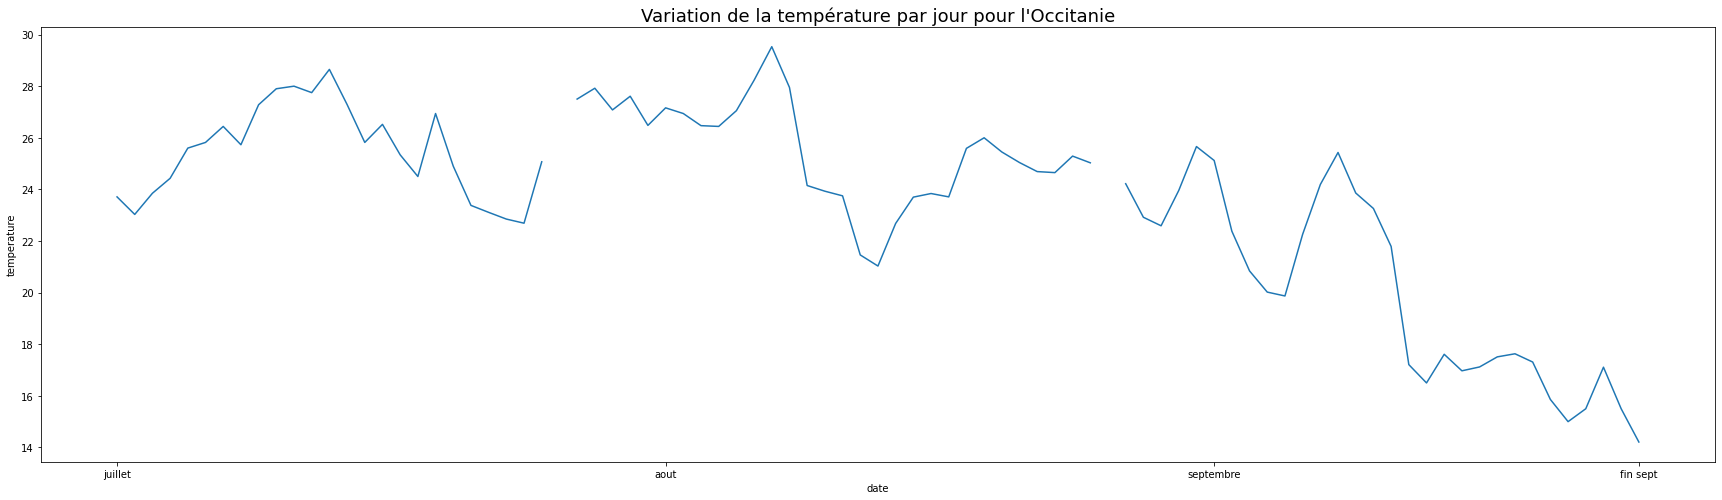

In [148]:
res=enedis_final[enedis_final["Région"]=='Occitanie'].groupby("date")["tmoy"].mean()
plt.figure(figsize=(30, 8))
plt.plot(res)
t2=["2022-07-06","2022-08-06","2022-09-06","2022-09-30"]
plt.xticks(t2,["juillet","aout","septembre","fin sept"])
plt.xlabel('date')
plt.ylabel('temperature')
plt.title("Variation de la température par jour pour l'"+'Occitanie',size=18)
plt.show()

In [177]:
def temp_day_region(df,region):
    res=enedis_final[enedis_final["Région"]==region].groupby("date")["tmoy"].mean()
    plt.plot(res, label= region)
    t2=["2022-07-06","2022-08-06","2022-09-06","2022-09-30"]
    plt.xticks(t2,["juillet","aout","septembre","fin sept"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.title("Variation de la température par jour pour l'"+region,size=18)
    
    

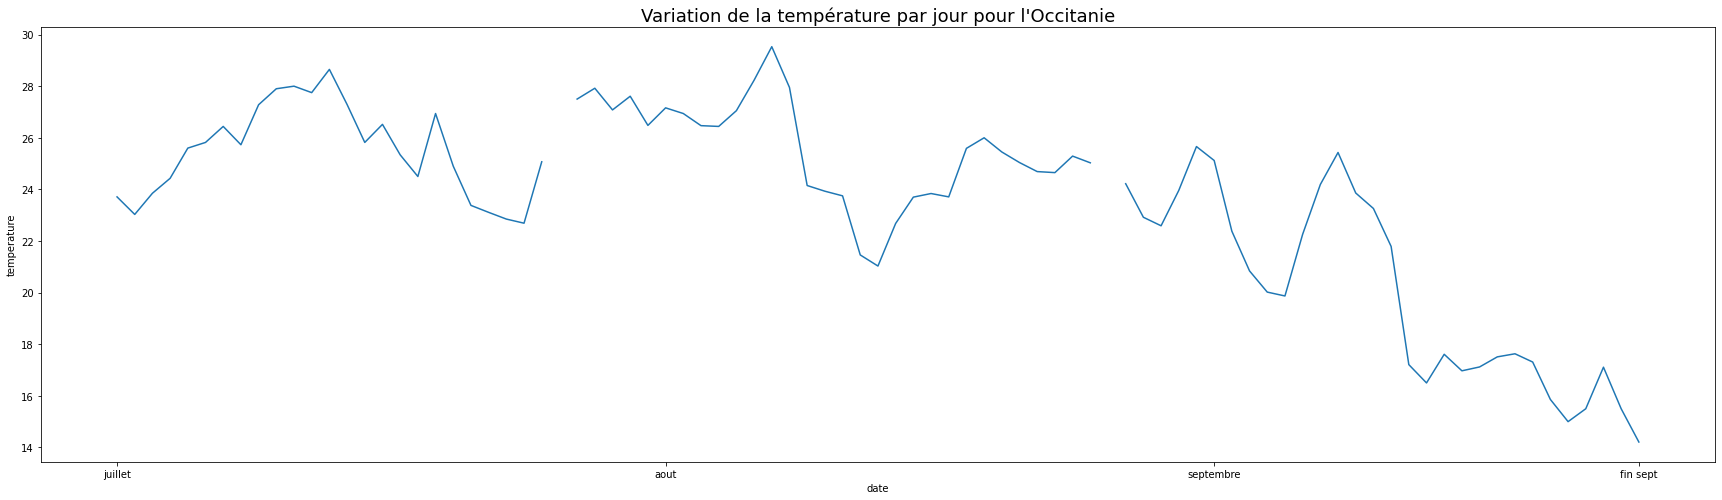

In [181]:
plt.figure(figsize=(30, 8))
temp_day_region(enedis_final,'Occitanie')

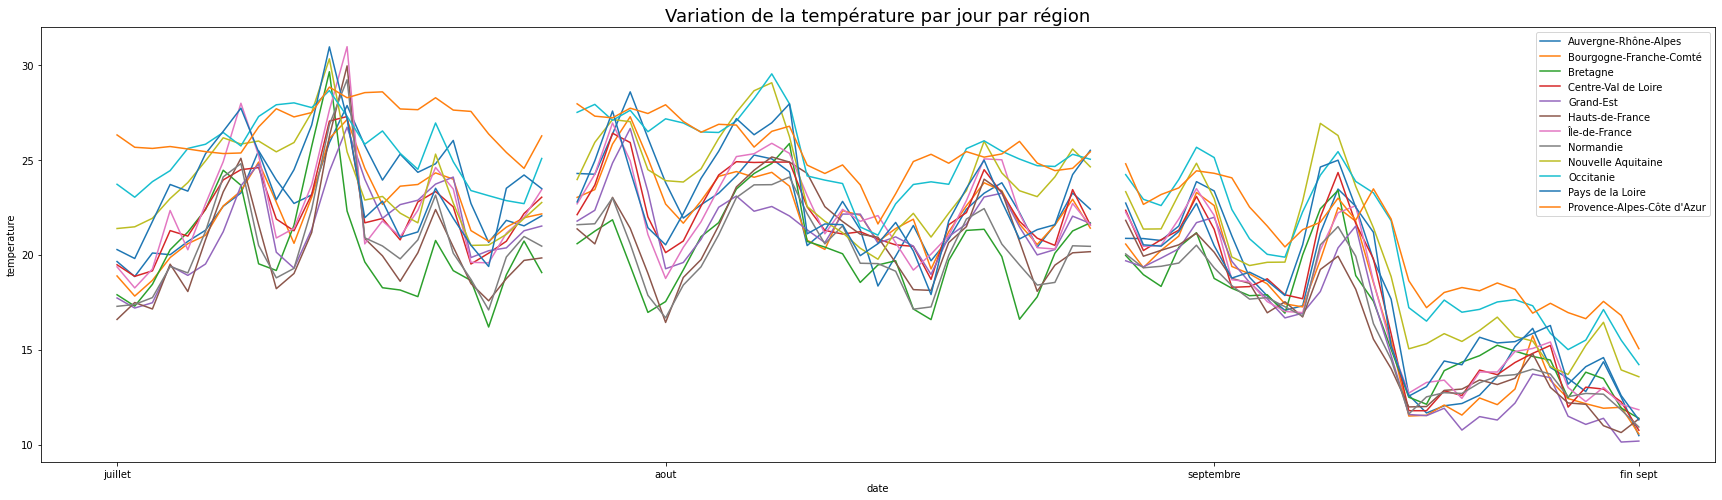

In [180]:
regions=list(enedis_final["Région"].unique())

def temp_day_regions(df,regions):
    plt.figure(figsize=(30, 8))
    for region in regions:
        temp_day_region(enedis_final,region)
    t2=["2022-07-06","2022-08-06","2022-09-06","2022-09-30"]
    plt.xticks(t2,["juillet","aout","septembre","fin sept"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.legend()
    plt.title("Variation de la température par jour par région",size=18)
    plt.show()

temp_day_regions(enedis_final,regions)

* Corrélation entre Température moyenne et Total d'énergie soutirée A verifier

In [222]:
X1

date
2022-07-06    23.71
2022-07-07    23.03
2022-07-08    23.85
2022-07-09    24.43
2022-07-10    25.60
              ...  
2022-09-26    15.00
2022-09-27    15.50
2022-09-28    17.11
2022-09-29    15.50
2022-09-30    14.21
Name: tmoy, Length: 87, dtype: float64

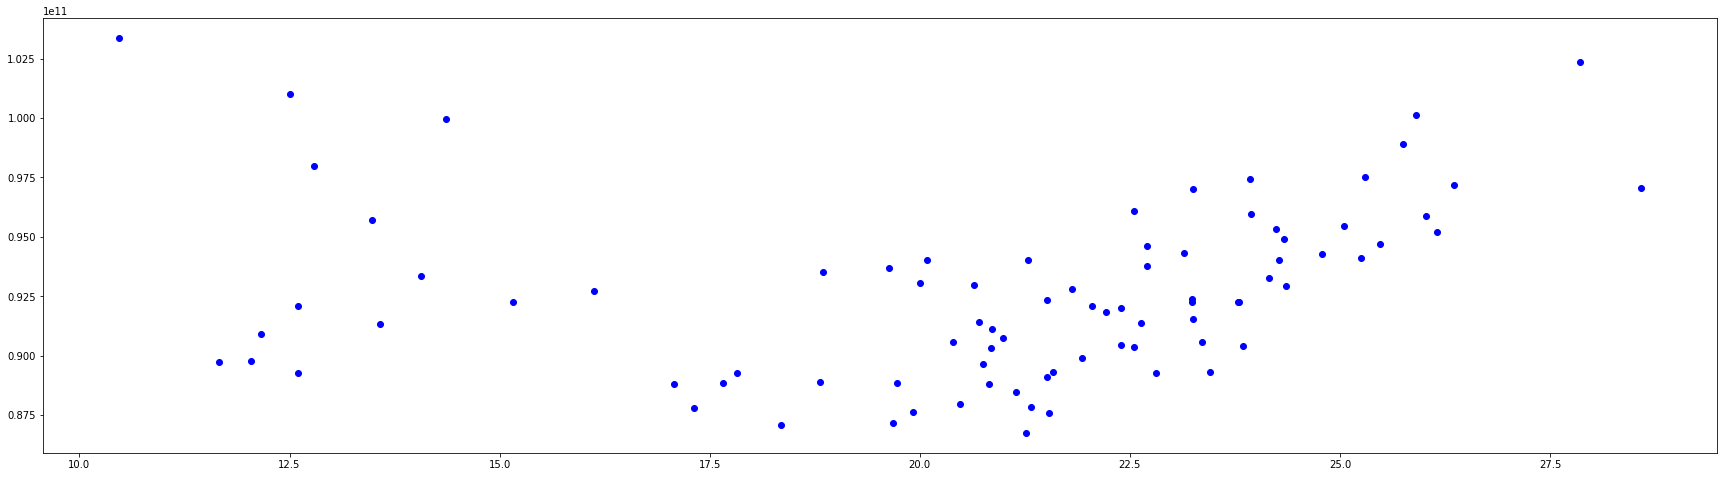

In [231]:
X1=enedis_final[enedis_final["Région"]=="Auvergne-Rhône-Alpes"].groupby("date")["tmoy"].mean()
X2=enedis_final[enedis_final["Région"]=="Auvergne-Rhône-Alpes"].groupby("date")["Total énergie soutirée (Wh)"].sum()
plt.figure(figsize=(30, 8))
plt.plot(X1,X2,"ob")
plt.show()

In [232]:
X1.corr(X2)

0.15440895785996953

<AxesSubplot:xlabel='Région'>

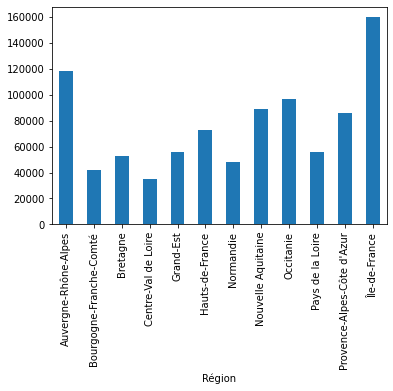

In [241]:
mean_soutirage_temp=enedis_final.groupby(["Région","date"])["Nb points soutirage"].mean().reset_index()
mean_soutirage=mean_soutirage_temp.groupby("Région")["Nb points soutirage"].mean()

mean_soutirage.plot.bar()

In [65]:
count_region=enedis.groupby("Région").agg({"Total énergie soutirée (Wh)":"sum"})

count_region=pd.DataFrame(count_region.to_records())
count_region

,Région,Total énergie soutirée (Wh)
0,Auvergne-Rhône-Alpes,8.053671e+12
1,Bourgogne-Franche-Comté,2.830021e+12
2,Bretagne,3.424769e+12
3,Centre-Val de Loire,2.411836e+12
4,Grand-Est,3.864916e+12
5,Hauts-de-France,4.727723e+12
6,Normandie,3.247521e+12
7,Nouvelle Aquitaine,6.509804e+12
8,Occitanie,7.403876e+12
9,Pays de la Loire,3.826694e+12


In [133]:
def conso_day_reg(df,region):
    res=df[df["Région"]==region].groupby("date")["Total énergie soutirée (Wh)"].sum()
    plt.figure(figsize=(30, 8))
    plt.plot(res)
    t2=["2022-07-06","2022-08-06","2022-09-06","2022-09-30"]
    plt.xticks(t2,["juillet","aout","septembre","fin sept"])
    plt.xlabel('date')
    plt.ylabel('consommation par Wh')
    plt.title("Variation de la consommation électrique par jour pour l'"+region,size=18)
    plt.show
    

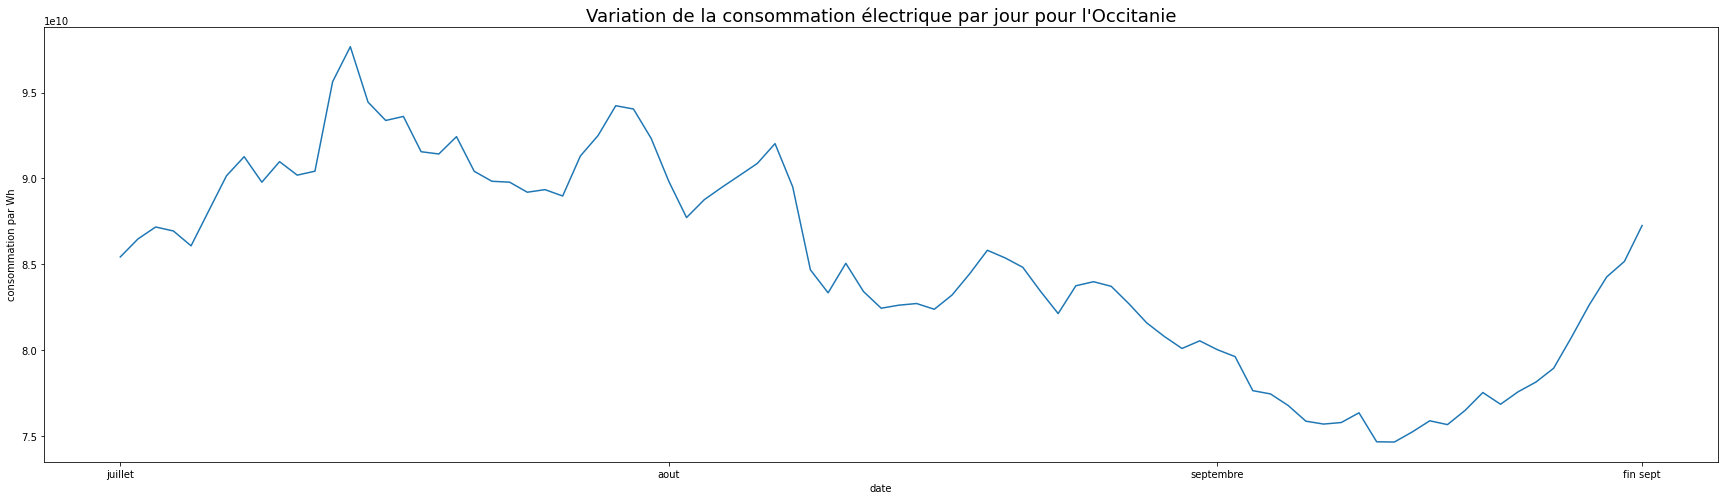

In [134]:
res=conso_day_reg(enedis_final,'Occitanie')

In [116]:
region_conso_day=enedis_final.groupby(["Région","date"])["Total énergie soutirée (Wh)"].sum().reset_index()

In [124]:
region_conso_socio=pd.merge(region_conso_day,socio,how='left',left_on="Région",right_on="Libellé")

In [127]:
region_conso_socio["conso_moyenne"]=region_conso_socio["Total énergie soutirée (Wh)"]/region_conso_socio["Population au dernier recensement 2018"]

In [128]:
region_conso_socio

,Région,date,Total énergie soutirée (Wh),Code,Libellé,"Part des ""artisans, commerçants, chefs d'entreprise"" dans la population 2018","Part des ""employés"" dans la population 2018","Part des ""ouvriers"" dans la population 2018","Part des ""retraités"" dans la population 2018","Part des ""agriculteurs exploitants"" dans la population 2018",...,"Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018,conso_moyenne
0,Auvergne-Rhône-Alpes,2022-07-06,9.368730e+10,84.0,Auvergne-Rhône-Alpes,3.9,15.6,12.4,27.0,0.8,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,11719.029993
1,Auvergne-Rhône-Alpes,2022-07-07,9.352084e+10,84.0,Auvergne-Rhône-Alpes,3.9,15.6,12.4,27.0,0.8,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,11698.207758
2,Auvergne-Rhône-Alpes,2022-07-08,9.403138e+10,84.0,Auvergne-Rhône-Alpes,3.9,15.6,12.4,27.0,0.8,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,11762.068963
3,Auvergne-Rhône-Alpes,2022-07-09,9.305765e+10,84.0,Auvergne-Rhône-Alpes,3.9,15.6,12.4,27.0,0.8,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,11640.268025
4,Auvergne-Rhône-Alpes,2022-07-10,9.143844e+10,84.0,Auvergne-Rhône-Alpes,3.9,15.6,12.4,27.0,0.8,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,11437.726607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,Île-de-France,2022-09-26,1.132350e+11,11.0,Île-de-France,3.2,16.4,8.5,19.4,0.1,...,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1,9271.338164
1040,Île-de-France,2022-09-27,1.158489e+11,11.0,Île-de-France,3.2,16.4,8.5,19.4,0.1,...,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1,9485.354128
1041,Île-de-France,2022-09-28,1.182389e+11,11.0,Île-de-France,3.2,16.4,8.5,19.4,0.1,...,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1,9681.045433
1042,Île-de-France,2022-09-29,1.192044e+11,11.0,Île-de-France,3.2,16.4,8.5,19.4,0.1,...,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1,9760.091502


<AxesSubplot:title={'center':'conso_moyenne'}, xlabel='Région'>

<Figure size 2160x720 with 0 Axes>

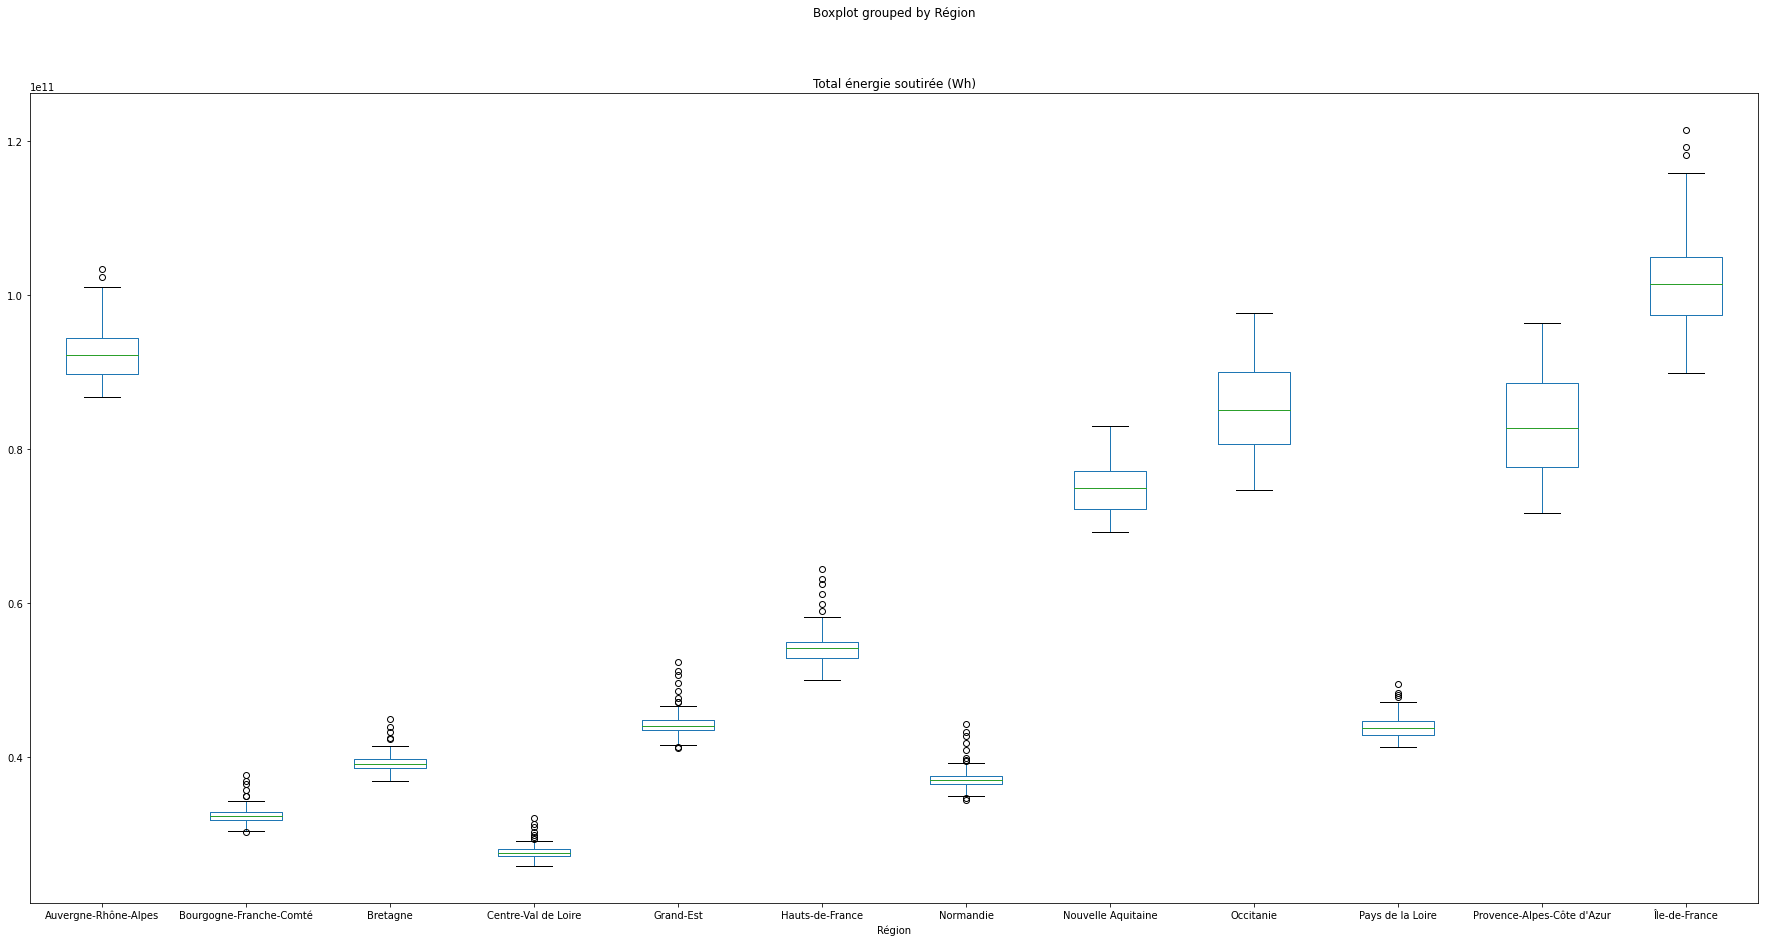

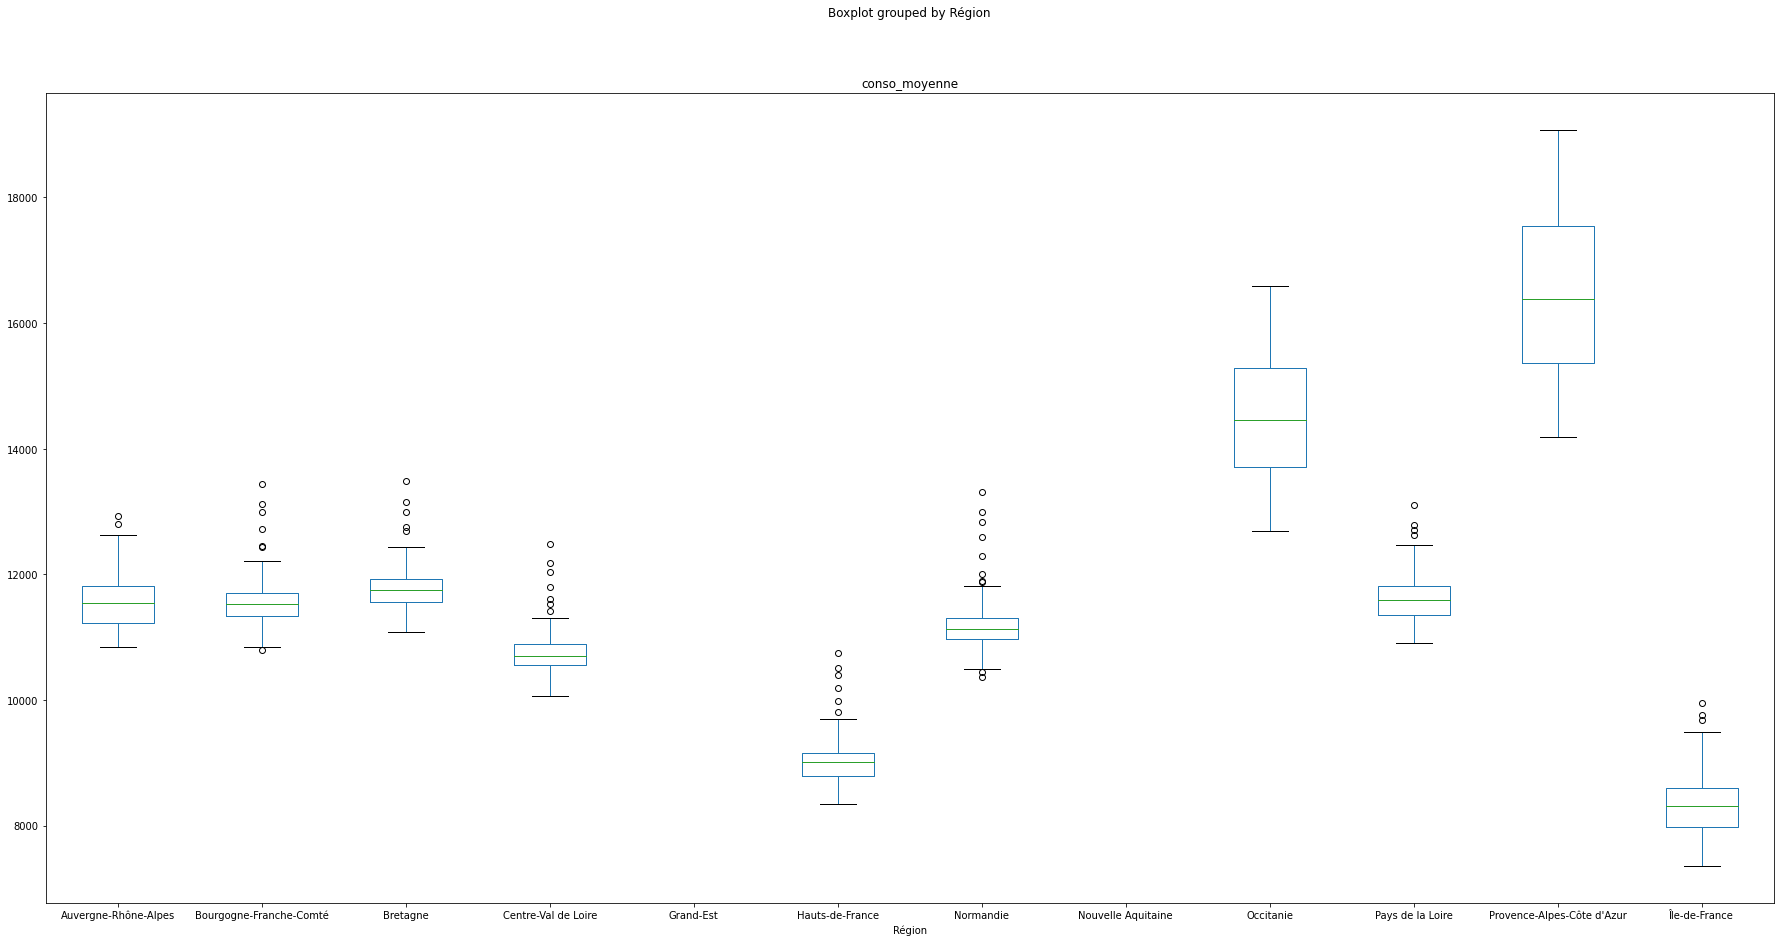

In [130]:
plt.figure(figsize=(30, 10))
region_conso_day.boxplot(by="Région",column=["Total énergie soutirée (Wh)"],grid=False,figsize=(30, 15))
region_conso_socio.boxplot(by="Région",column=["conso_moyenne"],grid=False,figsize=(30, 15))